In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import scipy.stats as stats
import xskillscore as xs

from hotutils import areamean_utils as am 
from hotutils import season_utils as sc
from hotutils import scplot_utils as scplot
from hotutils import calmap_utils as calm
from hotutils import corrplot_utils as cplot
from hotutils import mapplot_utils as mplt

import warnings
warnings.filterwarnings('ignore')
plt.rc('font', family='Arial')

### Read Precipitation and TMAX files

In [2]:
time_his = slice('1986','2005')
time_ssp = slice('2080','2099')
nh_range,sh_range = slice(0,25),slice(-25,0)
#Precipitation
path_pr5 = '/home/donghq/dong_hq/cmip6/heatwave/cmip5/pr/MME/'
path_pr6 = '/home/donghq/dong_hq/cmip6/heatwave/hist_ssp/pr/monthly/MME/'
pr5   = xr.open_dataset(path_pr5+'pr_Amon_30MME_historical_rcp85_r1i1p1f1_19620101-20991231_regrid.nc').pr * 24 * 3600
pr6   = xr.open_dataset(path_pr6+'pr_Amon_27MME_historcial_ssp585_r1i1p1f1_196201-209912_regrid.nc').pr * 24 * 3600
pr    = xr.concat([pr6,pr5],dim='model')
#TMAX
path_tx5 = '/home/donghq/dong_hq/cmip6/heatwave/cmip5/tasmax/MME/'
path_tx6 = '/home/donghq/dong_hq/cmip6/heatwave/hist_ssp/tasmax/MME/'
tx5   = xr.open_dataset(path_tx5+'tasmax_Amon_30MME_historical_rcp85_r1i1p1f1_195501-209912_regrid.nc').tasmax
tx6   = xr.open_dataset(path_tx6+'tasmax_Amon_27MME_historcial_ssp585_r1i1p1f1_197901-210012_regrid.nc').tasmax
tx    = xr.concat([tx6.sel(time=slice('1979','2099')),tx5.sel(time=slice('1979','2099'))],dim='model')

In [3]:
model5  = 'ACCESS1-0 ACCESS1-3 bcc-csm1-1-m bcc-csm1-1 BNU-ESM CanESM2 CCSM4 CESM1-BGC CMCC-CESM CMCC-CM CMCC-CMS CNRM-CM5 CSIRO-Mk3-6-0 FGOALS-g2 GFDL-CM3 GFDL-ESM2G GFDL-ESM2M HadGEM2-CC HadGEM2-ES inmcm4 IPSL-CM5A-LR IPSL-CM5A-MR IPSL-CM5B-LR MIROC-ESM-CHEM MIROC-ESM MIROC5 MPI-ESM-LR MPI-ESM-MR MRI-CGCM3 NorESM1-M'
model6  = 'ACCESS-CM2 ACCESS-ESM1-5 AWI-CM-1-1-MR BCC-CSM2-MR CanESM5 CMCC-ESM2 CNRM-CM6-1 CNRM-CM6-1-HR CNRM-ESM2-1 EC-Earth3 EC-Earth3-Veg FGOALS-g3 GFDL-CM4 GFDL-ESM4 GISS-E2-1-G HadGEM3-GC31-LL HadGEM3-GC31-MM INM-CM4-8 INM-CM5-0 IPSL-CM6A-LR MIROC6 MPI-ESM1-2-HR MPI-ESM1-2-LR MRI-ESM2-0 NESM3 NorESM2-LM NorESM2-MM'
models5 = model5.split()
models6 = model6.split()
models  = models6 + models5

### Calculate area-mean over NTL and STL

In [4]:
#Precipitation
pr_nh_amh = am.ram(pr.sel(time=time_his,lat=nh_range),'land')
pr_nh_ams = am.ram(pr.sel(time=time_ssp,lat=nh_range),'land')
pr_sh_amh = am.ram(pr.sel(time=time_his,lat=sh_range),'land')
pr_sh_ams = am.ram(pr.sel(time=time_ssp,lat=sh_range),'land')
#TMAX
tx_nh_amh = am.ram(tx.sel(time=time_his,lat=nh_range),'land')
tx_nh_ams = am.ram(tx.sel(time=time_ssp,lat=nh_range),'land')
tx_sh_amh = am.ram(tx.sel(time=time_his,lat=sh_range),'land')
tx_sh_ams = am.ram(tx.sel(time=time_ssp,lat=sh_range),'land')

### Calcualte Seasonal cycle changes

In [5]:
#Precipitation
pr_nh_d,pr_nh_p,pr_nh_m,pr_nh_h = sc.dps(pr_nh_ams.mean('model'),pr_nh_amh.mean('model'))
pr_sh_d,pr_sh_p,pr_sh_m,pr_sh_h = sc.dps(pr_sh_ams.mean('model'),pr_sh_amh.mean('model'))
pr_nh_err = sc.dps_err(pr_nh_ams,pr_nh_amh)
pr_sh_err = sc.dps_err(pr_sh_ams,pr_sh_amh)
#TMAX
tx_nh_d,tx_nh_p,tx_nh_m,tx_nh_h = sc.dps(tx_nh_ams.mean('model'),tx_nh_amh.mean('model'))
tx_sh_d,tx_sh_p,tx_sh_m,tx_sh_h = sc.dps(tx_sh_ams.mean('model'),tx_sh_amh.mean('model'))
tx_nh_err = sc.dps_err(tx_nh_ams,tx_nh_amh)
tx_sh_err = sc.dps_err(tx_sh_ams,tx_sh_amh)

### Correlation between spring PR & TX

In [6]:
#TX Spring
tmax_nh_amj = sc.avg_amj(tx_nh_amh,tx_nh_ams)
tmax_sh_son = sc.avg_son(tx_sh_amh,tx_sh_ams)
#PR Spring
pr_nh_amj   = sc.avg_amj(pr_nh_amh,pr_nh_ams)
pr_sh_son   = sc.avg_son(pr_sh_amh,pr_sh_ams)
#calculate correlation
corr_nh_spr = stats.pearsonr(pr_nh_amj, tmax_nh_amj)
corr_sh_spr = stats.pearsonr(pr_sh_son, tmax_sh_son)

### PR and TX spring pattern 

In [7]:
#Precipitation
pr_nh_sp  = sc.amj_change(pr.sel(time=time_his,lat=slice(0,30)) ,pr.sel(time=time_ssp,lat=slice(0,30)))
pr_sh_sp  = sc.son_change(pr.sel(time=time_his,lat=slice(-30,0)),pr.sel(time=time_ssp,lat=slice(-30,0)))
pr_sp     = calm.ns_vstack(pr_sh_sp,pr_nh_sp)
pr_sp_mm  = pr_sp.mean('model')
pr_sp_p   = calm.percentile_pattern(pr_sp,0.7)
pr_sp_p[12,:] = np.nan
#TMAX
tx_nh_sp  = sc.amj_change(tx.sel(time=time_his,lat=slice(0,30)) ,tx.sel(time=time_ssp,lat=slice(0,30)))
tx_sh_sp  = sc.son_change(tx.sel(time=time_his,lat=slice(-30,0)),tx.sel(time=time_ssp,lat=slice(-30,0)))
tx_sp     = calm.ns_vstack(tx_sh_sp,tx_nh_sp)
tx_sp_mm  = tx_sp.mean('model')
tx_sp_p   = calm.percentile_pattern(tx_sp,0.7)
tx_sp_p[12,:] = np.nan

In [8]:
corr_pattern = xs.pearson_r(calm.mask_land(pr_sp_mm,'ocean','lon'),calm.mask_land(tx_sp_mm,'ocean','lon'),dim=('lon','lat'),keep_attrs=True,skipna=True)

### Plot

In [9]:
# set colorbar
cmap_t = mplt.cmap('BlueYellowRed')
cmap_p = mplt.cmap('MPL_BrBG')

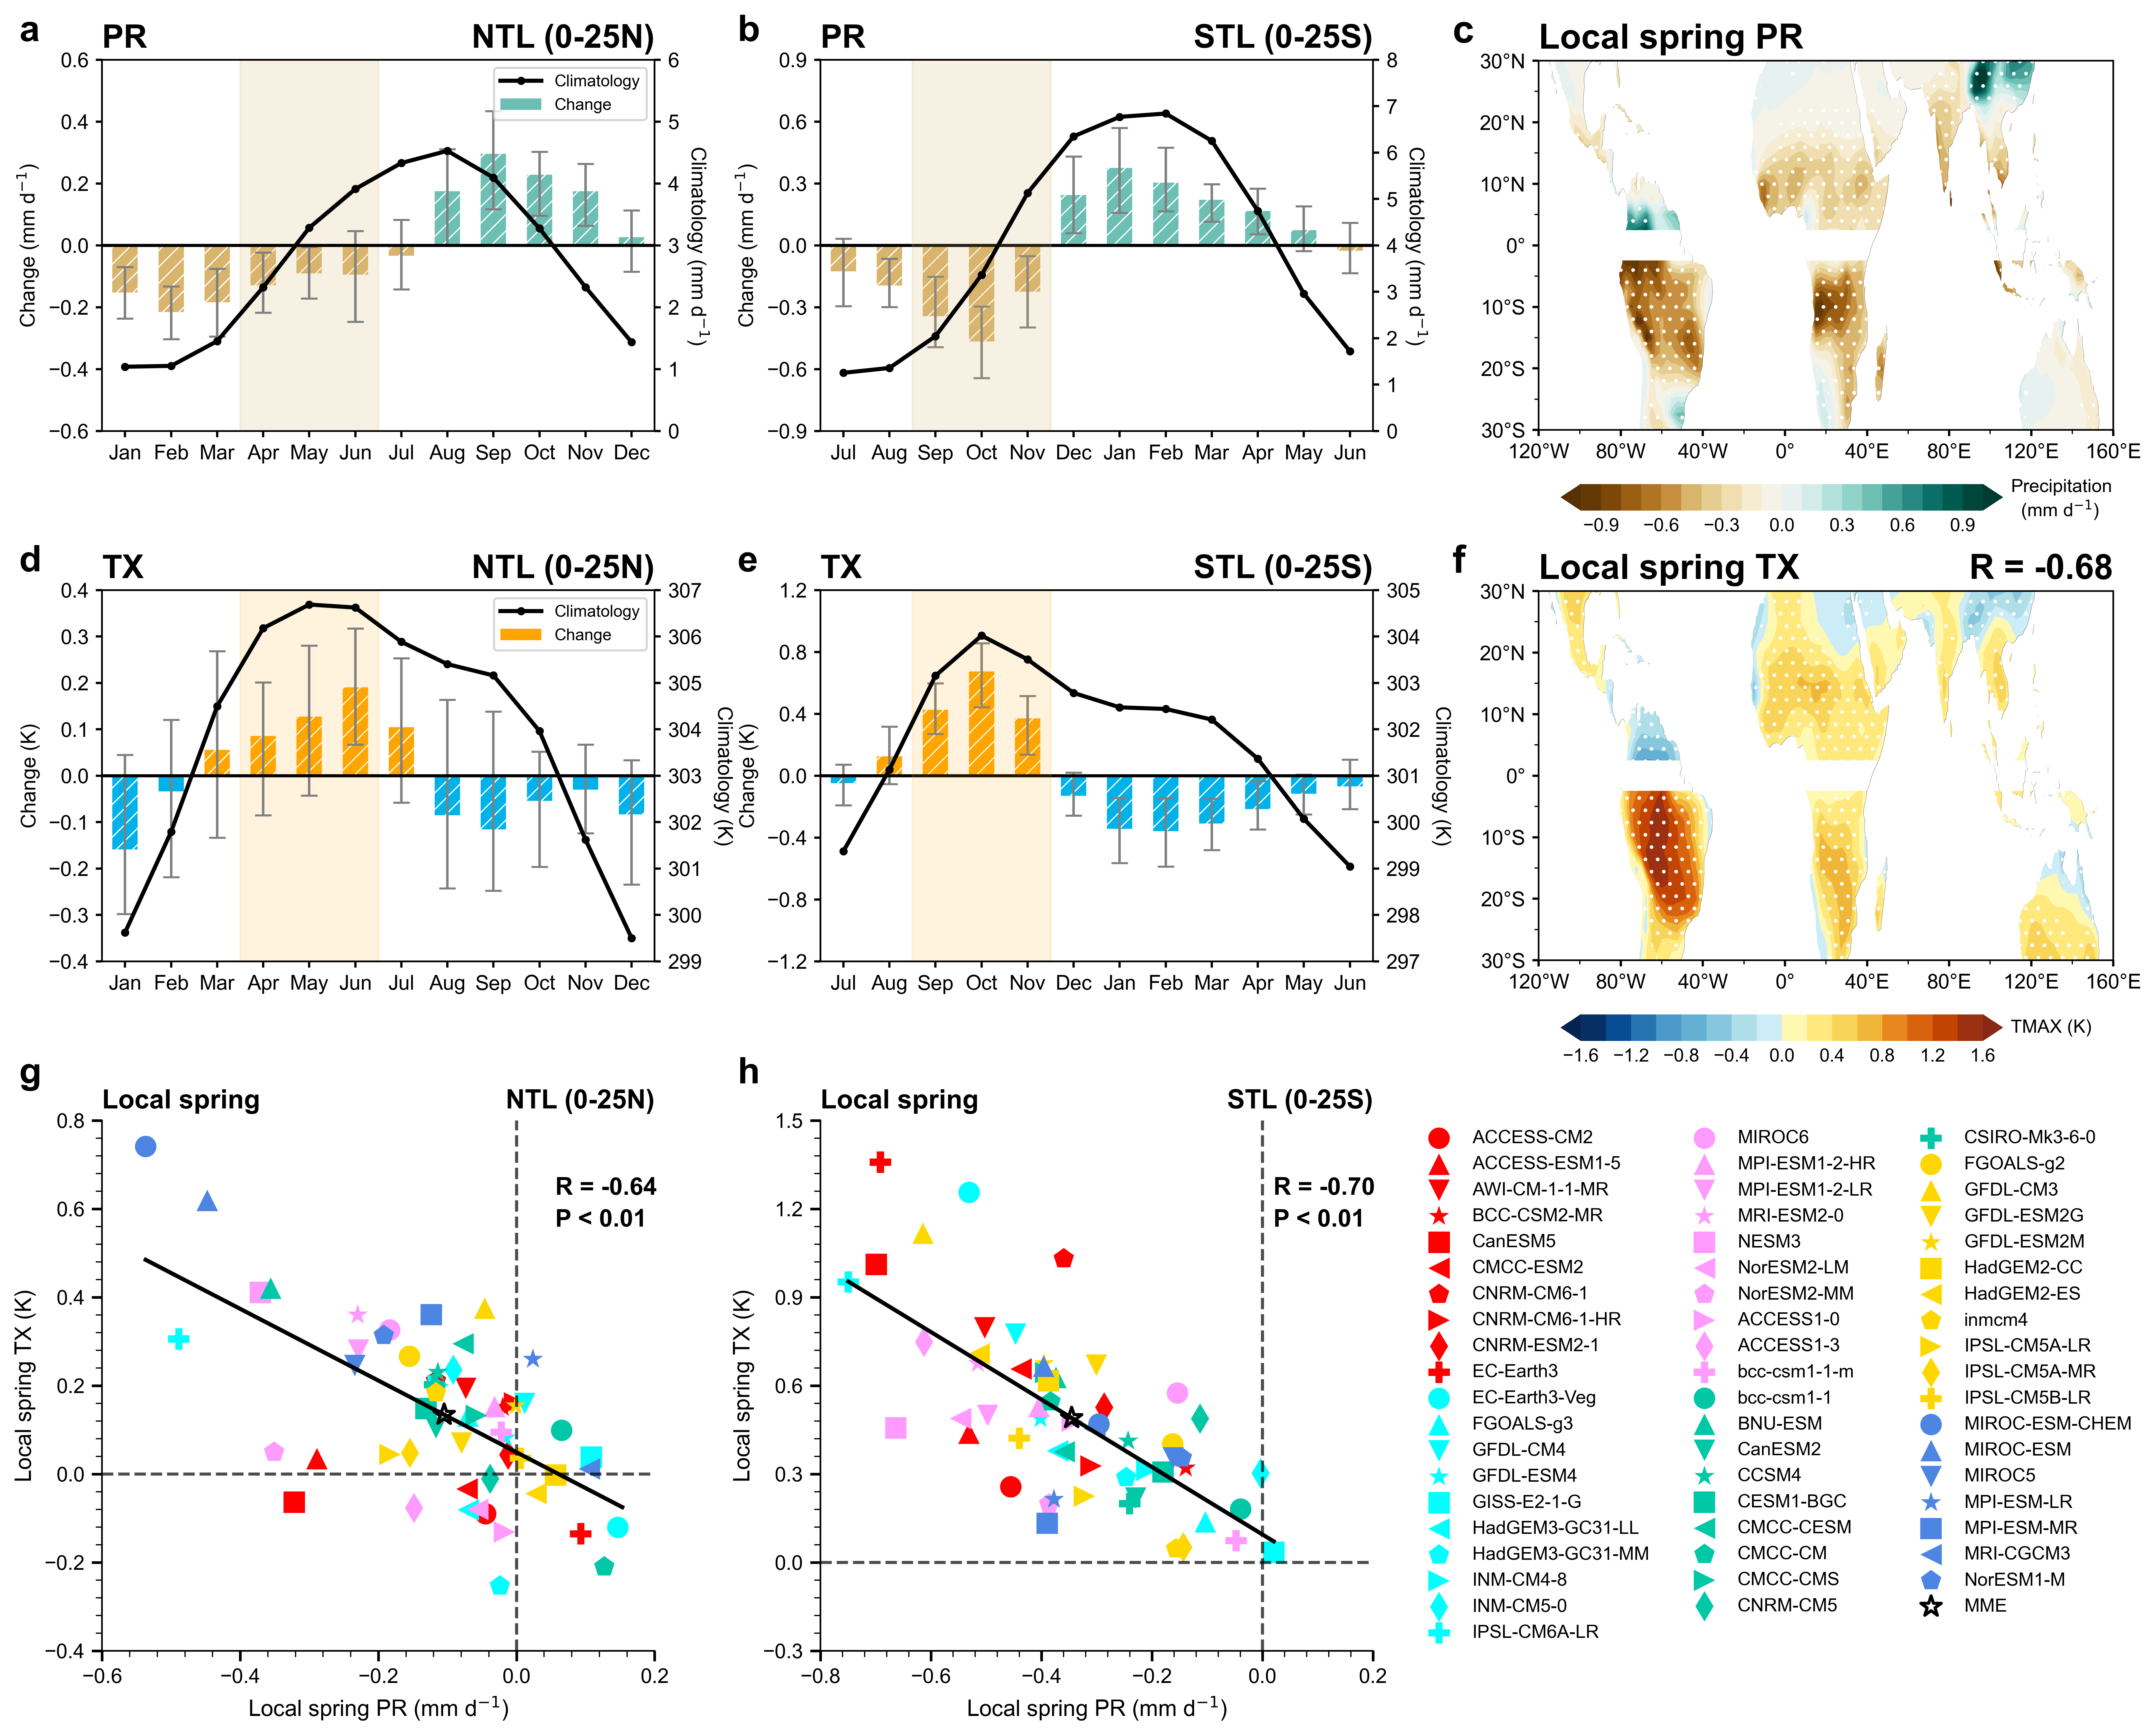

In [17]:
ft = 10
fig = plt.figure(figsize=(15, 12), dpi=500)
plt.rcParams['hatch.color'] = 'white'
plt.rcParams['hatch.linewidth'] = 0.6
scplot.ax_scn(fig,pr_nh_d,pr_nh_h,pr_nh_p,pr_nh_err,0.6,[0,6],0.2,1,[0.15,0.05],'a',
       'PR','','NTL (0-25N)','Change (mm d$^{-1}$)','Climatology (mm d$^{-1}$)',
       ft,0.05,0.30,0.74,0.95,if_var='pr',if_legend=True)

scplot.ax_scs(fig,pr_sh_d,pr_sh_h,pr_sh_p,pr_sh_err,0.9,[0,8],0.3,1,[0.15,0.05],'b',
       'PR','','STL (0-25S)','Change (mm d$^{-1}$)','Climatology (mm d$^{-1}$)',
       ft,0.375,0.625,0.74,0.95,if_var='pr',if_legend=False)


ax1,c1 = mplt.axtp_changes_plot(fig,pr_sp_mm,pr_sp_p,cmap_p,np.arange(-1,1.1,0.1),
                 [0.15,0.05],'c','Local spring PR','','',True,ft,0.70,0.96,0.74,0.95,aspect=3)

cb1 = fig.colorbar(c1,cax=fig.add_axes([0.71,0.695,0.2,0.015]) ,orientation='horizontal',aspect=18,extendfrac=0.05) #, shrink=0.8, pad=0.1 
cb1.ax.tick_params(which='major',direction='in',labelsize=ft-1,length=0,color='k')
cb1.outline.set_visible(False)
ax1.text(110,-44,'Precipitation\n  (mm d$^{-1}$)',fontsize=ft-1)

scplot.ax_scn(fig,tx_nh_d,tx_nh_h,tx_nh_p,tx_nh_err,0.4,[299,307],0.1,1,[0.15,0.05],'d',
       'TX','','NTL (0-25N)','Change (K)','Climatology (K)',
       ft,0.05,0.30,0.44,0.65,if_var='tx',if_legend=True)

scplot.ax_scs(fig,tx_sh_d,tx_sh_h,tx_sh_p,tx_sh_err,1.2,[297,305],0.4,1,[0.15,0.05],'e',
       'TX','','STL (0-25S)','Change (K)','Climatology (K)',
       ft,0.375,0.625,0.44,0.65,if_var='tx',if_legend=False)

ax2,c2 = mplt.axtp_changes_plot(fig,tx_sp_mm,tx_sp_p,cmap_t,np.arange(-1.6,1.7,0.2),
                 [0.15,0.05],'f','Local spring TX','','R = '+calm.save_point(corr_pattern,2),True,ft,0.70,0.96,0.44,0.65,aspect=3)

cb2 = fig.colorbar(c2,cax=fig.add_axes([0.71,0.395,0.2,0.015]) ,orientation='horizontal',aspect=18,extendfrac=0.05) #, shrink=0.8, pad=0.1 
cb2.ax.tick_params(which='major',direction='in',labelsize=ft-1,length=0,color='k')
cb2.outline.set_visible(False)
ax2.text(110,-41.7,'TMAX (K)',fontsize=ft-1)

ax3 = cplot.ax_corr(fig,pr_nh_amj,tmax_nh_amj,[-0.6,0.2],[-0.4,0.8],0.2,0.2,0.82,0.8,[0.15,0.07],corr_nh_spr,models,
             ['Local spring PR (mm d$^{-1}$)','Local spring TX (K)'],'g','Local spring','','NTL (0-25N)',False,ft,0.05,0.30,0.05,0.35,sft=110,if_minor=True)
ax4 = cplot.ax_corr(fig,pr_sh_son,tmax_sh_son,[-0.8,0.2],[-0.3,1.5],0.2,0.3,0.82,0.8,[0.15,0.07],corr_sh_spr,models,
             ['Local spring PR (mm d$^{-1}$)','Local spring TX (K)'],'h','Local spring','','STL (0-25S)',False,ft,0.375,0.625,0.05,0.35,sft=110,if_minor=True)

ax4.legend(loc='center',bbox_to_anchor=(1.73, 0.5),ncol = 3,fontsize=ft-1,frameon=False)

plt.show()